Importing Data to the File 


In [38]:
import pandas as pd

df = pd.read_excel('Superstore-Dataset.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


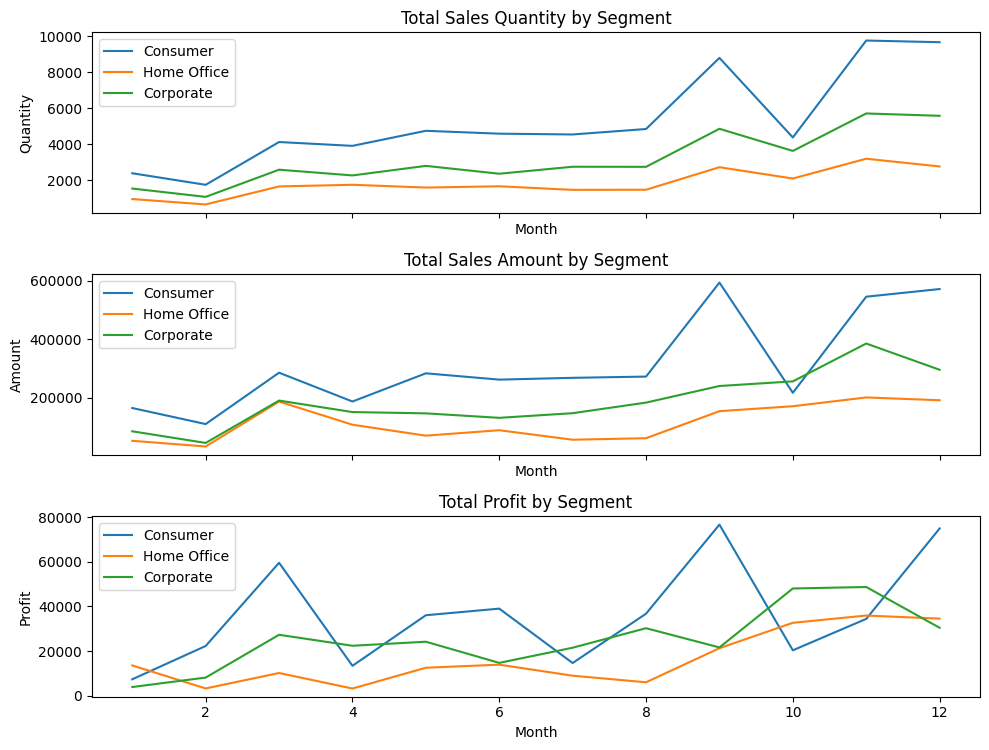

In [39]:
consumer_segment = df[df['Segment'] == 'Consumer']
home_office_segment = df[df['Segment'] == 'Home-Office']
corporate_segment = df[df['Segment'] == 'Corporate']

total_sales_consumer = consumer_segment['Sales'].sum()
total_sales_home_office = home_office_segment['Sales'].sum()
total_sales_corporate = corporate_segment['Sales'].sum()
total_profit_consumer = consumer_segment['Profit'].sum()
total_profit_home_office = home_office_segment['Profit'].sum()
total_profit_corporate = corporate_segment['Profit'].sum()

import matplotlib.pyplot as plt

# Group the data by segment and month
grouped_data = df.groupby([df['Segment'], df['Order Date'].dt.month])

# Calculate the total quantity, total sales, and total profit for each segment and month
total_quantity = grouped_data['Quantity'].sum()
total_sales = grouped_data['Sales'].sum()
total_profit = grouped_data['Profit'].sum()

# Get the unique segments and months
segments = df['Segment'].unique()
months = df['Order Date'].dt.month.unique()

# Create subplots for each segment
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot total sales quantity for each segment
for i, segment in enumerate(segments):
    segment_data = total_quantity[segment]
    axes[0].plot(months, segment_data, label=segment)
axes[0].set_title('Total Sales Quantity by Segment')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Quantity')
axes[0].legend()

# Plot total sales amount for each segment
for i, segment in enumerate(segments):
    segment_data = total_sales[segment]
    axes[1].plot(months, segment_data, label=segment)
axes[1].set_title('Total Sales Amount by Segment')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Amount')
axes[1].legend()

# Plot total profit for each segment
for i, segment in enumerate(segments):
    segment_data = total_profit[segment]
    axes[2].plot(months, segment_data, label=segment)
axes[2].set_title('Total Profit by Segment')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Profit')
axes[2].legend()

# Adjust the layout and spacing
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


In [56]:
import pandas as pd

# Read the CSV file into a DataFrame
new_df = pd.read_csv('data.csv')

# Check if all cells for Consumer, Home Office, and Corporate are zero
all_zero = (new_df['Consumer'] == 0) & (new_df['Home Office'] == 0) & (new_df['Corporate'] == 0)

# Update the Home Office column to 1 where all cells are zero
new_df.loc[all_zero, 'Home Office'] = 1

# Ensure that non-zero values in Consumer, Home Office, and Corporate are set to 1
new_df['Consumer'] = new_df['Consumer'].apply(lambda x: 1 if x != 0 else x)
new_df['Home Office'] = new_df['Home Office'].apply(lambda x: 1 if x != 0 else x)
new_df['Corporate'] = new_df['Corporate'].apply(lambda x: 1 if x != 0 else x)

# Assuming the original DataFrame df has a 'Quantity' column
# Create a new column 'Order Quantity' with the sum of Consumer, Home Office, and Corporate columns
new_df['Order Quantity'] = df['Quantity']
# Save the modified DataFrame back to the CSV file
new_df.to_csv('data_modified.csv', index=False)

# Print the first few rows to verify
print(new_df.head())


         Order ID  Consumer  Home Office  Corporate Date of Sale  \
0  US-2019-103800         1            0          0   2019-01-03   
1  US-2019-112326         0            1          0   2019-01-04   
2  US-2019-141817         1            0          0   2019-01-04   
3  US-2019-167199         0            1          0   2019-01-04   
4  US-2019-106054         0            0          1   2019-01-05   

   Order Quantity  
0               1  
1               1  
2               1  
3               1  
4               1  


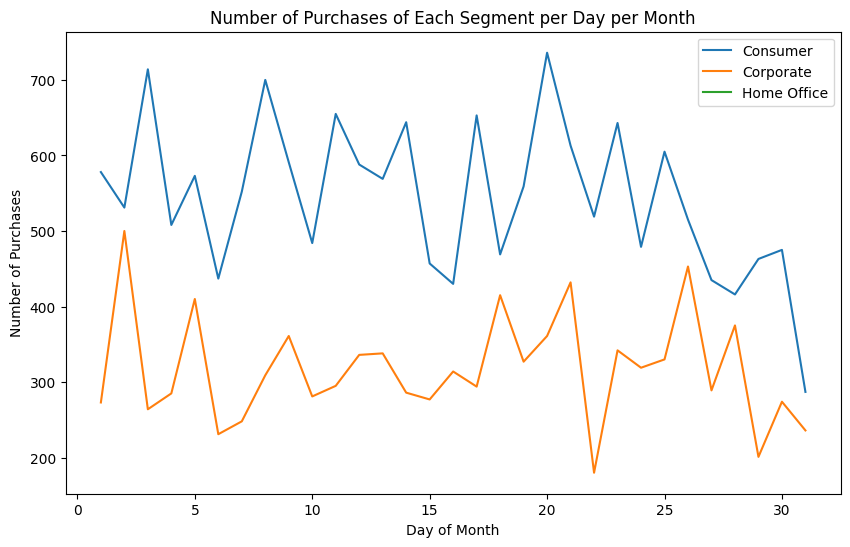

In [52]:
#To create a plot for the number of purchases of each segment per day per month, we can use the `consumer_segment`, `corporate_segment`, and `home_office_segment` dataframes. Here's the code to generate the plot:

import matplotlib.pyplot as plt

# Group the data by day and segment
consumer_counts = consumer_segment.groupby(consumer_segment['Order Date'].dt.day)['Segment'].count()
corporate_counts = corporate_segment.groupby(corporate_segment['Order Date'].dt.day)['Segment'].count()
home_office_counts = home_office_segment.groupby(home_office_segment['Order Date'].dt.day)['Segment'].count()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(consumer_counts.index, consumer_counts.values, label='Consumer')
plt.plot(corporate_counts.index, corporate_counts.values, label='Corporate')
plt.plot(home_office_counts.index, home_office_counts.values, label='Home Office')

# Set the plot labels and title
plt.xlabel('Day of Month')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases of Each Segment per Day per Month')

# Add a legend
plt.legend()

# Show the plot
plt.show()
